**F23 MATH 596 Final Project Code**

# Imports

In [1]:
# Backend Code
import credit_card_fraud as ccf

# Data Manip
import pandas as pd

# Grabbing Data

In [2]:
df = pd.read_csv(
    "creditcard_2023.csv",
    header = 'infer'
)
df.drop(['id'], axis=1, inplace = True)
df['Class'] = df['Class'].astype(bool)
df.head(5)

target='Class'

ccf.setup(df, 'Class')

In [3]:
print(ccf.get_features())

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


# Data Analysis - Histogram of Amount

Why we drop Amount


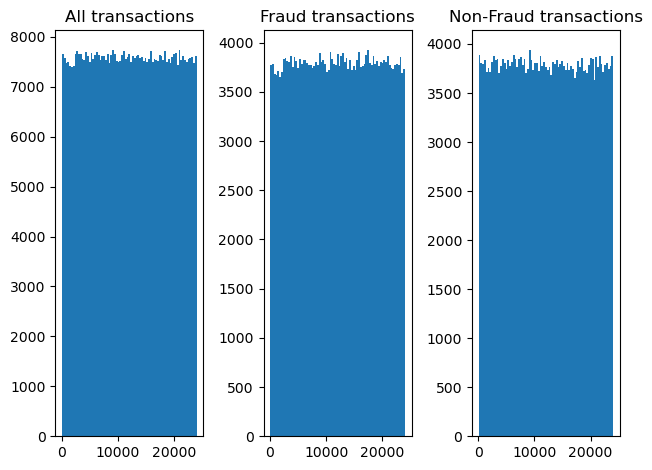

In [4]:
ccf.fraud_hist(75)

Clearly there is not decernable information we can learn from Amount, but we will keep for now to make inference later.

# Data Analysis - PCA

Why we drop V8, V13, V15, V20 V21, V22, V23, V24, V25, V26, V27, and V28

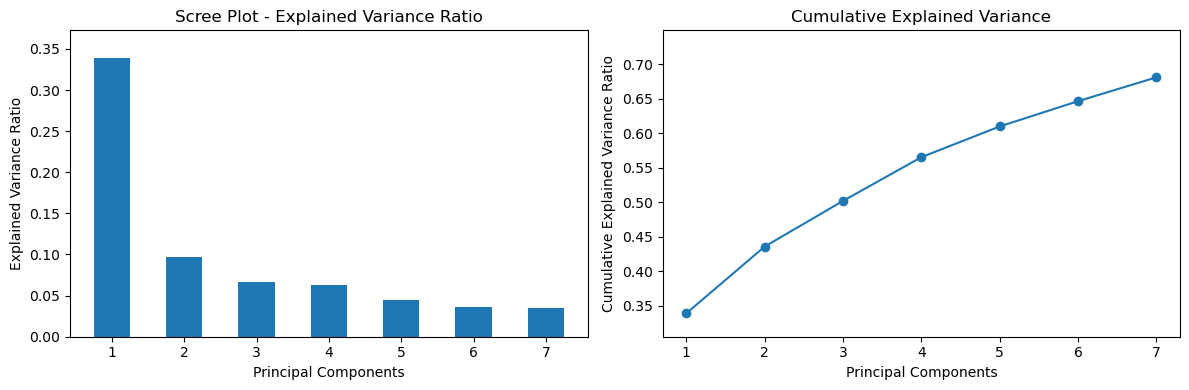

[0.33872158 0.09688719 0.06618998 0.06346626 0.04459286 0.03666183
 0.03459292 0.03441276 0.02999273 0.02833916 0.02597564 0.02131675
 0.01909455 0.0173951  0.01708433 0.0141626  0.01343088 0.01233759
 0.01219622 0.009879   0.00972481 0.0085329  0.00815503 0.00744716
 0.00675692 0.00656616 0.00629288 0.00601301 0.00378119]


In [5]:
ccf.scree_plt()

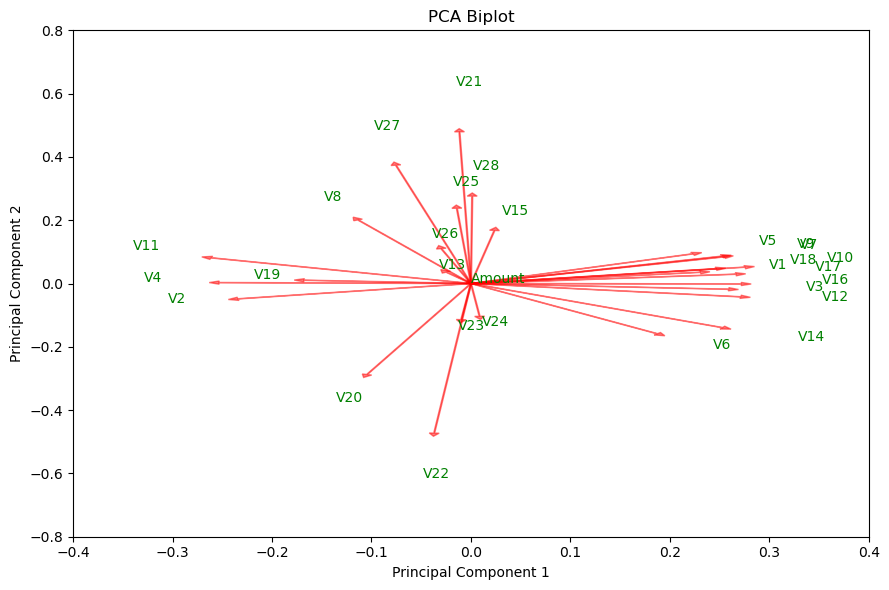

In [6]:
ccf.pca_biplot()

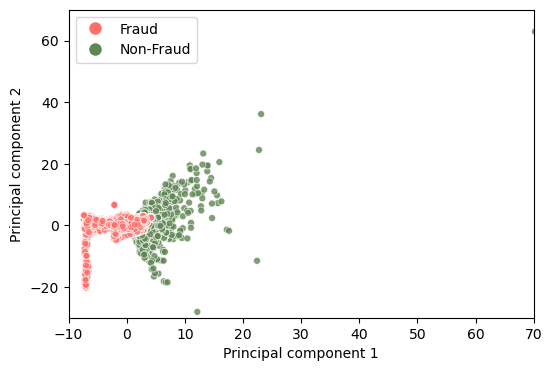

In [7]:
ccf.pca_scatter()

In [8]:
V = df[['V1','V2','V3','V4','V5','V6','V7','V9','V10','V11','V12','V14','V16','V17','V18','V19']]
y = df['Class']

# Modeling
How we constructed our model starting with linear Regression to our final LASSO model

In [9]:
ccf.fraud_model(V, y)

Mean linear regression model accuracy: 94.7 %



In [10]:
ccf.max_lambda(V, y)

Accuracy: 93.10000000000001 %
Lamda: 0.4


In [11]:
ccf.fraud_model(V, y, 20, True, 0, 0.25)
print("------------------------------------------------")
ccf.fraud_model(V, y, 20, True, 0.1, 0.3)
ccf.fraud_model(V, y, 20, True, 0.2, 0.4)
ccf.fraud_model(V, y, 20, True, 0.3, 0.45)
ccf.fraud_model(V, y, 20, True, 0.4, 0.5)
print("------------------------------------------------")
ccf.fraud_model(V, y, 20, True, 0.5, 0.25, True)
ccf.fraud_model(V, y, 20, True, 1, 0.25, True)
ccf.fraud_model(V, y, 20, True, 1.5, 0.25, True)
ccf.fraud_model(V, y, 20, True, 2, 0.25, True)

Mean linear Regression Model accuracy: 92.0 %
True positive rate: 97.5 %
True negative rate: 86.4 %
False positive rate: 13.6 %
False negative rate: 2.5 %

------------------------------------------------
Mean LASSO Regression Model accuracy: 89.3 %
True positive rate: 97.9 %
True negative rate: 80.6 %
False positive rate: 19.4 %
False negative rate: 2.1 %

Mean LASSO Regression Model accuracy: 92.1 %
True positive rate: 96.0 %
True negative rate: 88.2 %
False positive rate: 11.8 %
False negative rate: 4.0 %

Mean LASSO Regression Model accuracy: 87.6 %
True positive rate: 95.9 %
True negative rate: 79.4 %
False positive rate: 20.6 %
False negative rate: 4.1 %

Mean LASSO Regression Model accuracy: 93.0 %
True positive rate: 88.9 %
True negative rate: 97.1 %
False positive rate: 2.9 %
False negative rate: 11.1 %

------------------------------------------------
Mean ridge Regression Model accuracy: 92.0 %
True positive rate: 97.5 %
True negative rate: 86.4 %
False positive rate: 13.6 %